# Boundary Value Problem for the Laplace Equation on the Unit Interval

The notebook solves the Laplace equation on the unit interval using various in-build functions. We also use a user-defined function. We assume the computational domain $\Omega$ to be the unit interval and $0 < x < 1$. We denote the given source function and the unknown function as $f(x)$ and $u(x)$, respectively. We assume a Dirichlet boundary condition to hold in the left end point where $x=0$. We assume a Neumann boundary conditions to hold in the right end point where $x=1$. We denote the value of the normal derivative in $x=1$ as $\alpha$. The problem to be solved can thus be fomulated as   
\begin{align*}
  - \frac{d^2 u}{dx^2}(x) & = f(x) \text{ for } 0 < x < 1 \text{ (differential equation on $\Omega$) } \\
  u(x=0) & = 0 \text{ (Dirichlet boundary condition in $x=0$) }\\ 
  \frac{du}{dx}(x=1) & = \alpha \text{ (Neumann boundary condition in $x=1$) }  
\end{align*}
<b> Prerequisites </b>: Prerequisites for this notebook include 
<ul>
    <li> basic notions in linear algebra;
    <li> calculus in one variable. 
</ul>

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)

Succesfully imported numpy -- Version: 1.20.1
Succesfully imported scipy -- Version: 1.6.2
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported sympy -- Version: 1.8
Succesfully imported scipy.optimize


## First Example: Model with given analytical closed-form solution $ue(x)$

### Analytical solution $ue(x)$ and right-hand side vector $f(x)$

Define the exact solution $ue(x)$. Define the source function $f(x)$ as minus the second derivative of $ue(x)$. Plot $ue(x)$ and $f(x)$ for $0 < x < 1$. The source function will be used to define the right-hand side vector in the sequel of this notebook.

1


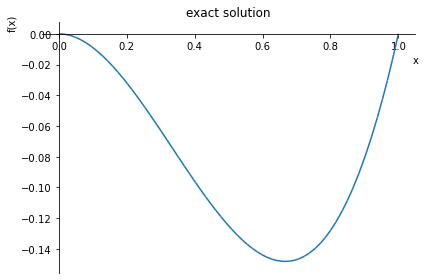

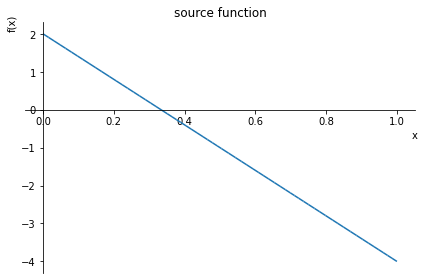

In [2]:
x, f, ue  = sym.symbols('x f ue');
# set the exact solution 
#ue = 0.5*x*x*x + (alpha-1)*x;
ue = x*x*(x-1)
# compute the first order derivative of ue 
ueprime = ue.diff(x)
# evaluate the first order derivative in the left end point x=1
alpha = ueprime.subs(x,1)
print(alpha)
# set source function by computing the second order derivative of the exact solution symbolically. 
f = -ue.diff(x,2)
sym.plot(ue, (x,0,1),title='exact solution'); 
sym.plot(f, (x,0,1),title='source function'); 
plt.show(); 

## Solve Symbolically using the sympy.dsolve() function 

In [6]:
# an elementary example of solving ODE using the sympy.dsolve() function 
# diff for the derivative can be called both as a function diff(v(x),x) or as a method v.diff(x)
# Derivative provides the unevaluated derivative. This derivative is required to define the equation to be defined. 
# to evaluate the unevaluated derivative, use the doit method 
 
from sympy import Function, dsolve, Eq, Derivative, sin 
from sympy.abc import x
import sympy
import math

# define v as a undefined function 
# equivalent is v = symbols('v', cls=Function)
v = Function('v')
x = sympy.symbols('x')
#eps = sympy.symbols('eps')

# define equation to be solved 
#lhs = eps*Derivative(-v(x), x, x) + Derivative(v(x), x)
lhs = Derivative(-v(x), x, x) + 0.01*Derivative(-v(x), x)
lhs = Derivative(-v(x), x, x) + v(x)
rhs = x
eq = Eq(lhs,rhs) 

# define the boundary conditions in the left and right end point 
# bcs = {v(0): 0, v(x).diff(x).subs(x,1):alpha}
bcs = {v(1): 0, v(1): 0}

# solve symbolically using dsolve
solution = dsolve(eq,v(x),ics=bcs) 

# print the solution 
print(solution)
print(solution.rhs)
print(solution.rhs.diff(x,2))

# plot the computed solution 
#p0 = sympy.plot(solution.rhs, (x,0,1),title='solution computed using dsolve()')

Eq(v(x), C2*exp(x) + x + (-C2*exp(2) - E)*exp(-x))
C2*exp(x) + x + (-C2*exp(2) - E)*exp(-x)
C2*exp(x) - E*(E*C2 + 1)*exp(-x)


In [10]:
from sympy import Function, dsolve, Eq
from sympy.abc import x
import sympy

In [11]:
v = Function('v')
x = sympy.symbols('x')
eq = Eq(v(x).diff(x,2),0)
sol = sym.dsolve(Eq)
print(sol)
#sol = sym.dsolve(Derivative(-f(x), x, x) -1, f(x),ics = {f(0): 0, f(x).diff(x,1).subs(x,1):A})
#p0 = sympy.plot(sol.rhs, (x,0,1), label = r'$\alpha = $'+f'{A}', show = False, legend = True, line_color = color[A])


ValueError: The function cannot be automatically detected for <class 'sympy.core.relational.Equality'>.

## Solve Numerically using the in-build scipy.integrate.solve_bvp() function

In [ ]:
sol = scipy.integrate.solve_bvp(diff, bc, t,u)
plt.plot(sol.x, sol.y[0], label = r'$\alpha = $'+f'{a}')

### Define an uniform mesh. Evaluate the exact analytical solution in the mesh to obtain a reference solution. Evaluate the source function in the mesh to obtain the righ-hand side vector 

Define mesh. Evaluate exact solution in mesh points (reference solution) and source function in mesh points 
(right-hand vector in linear system). 

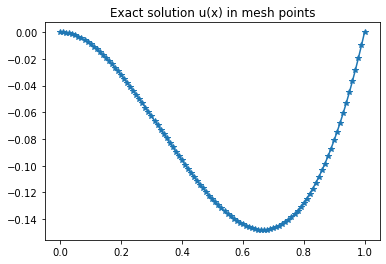

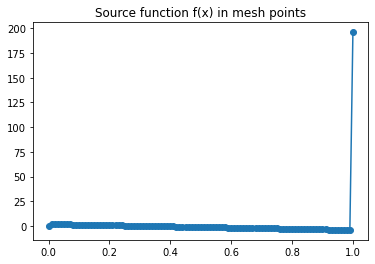

In [164]:
N=100; h=1/N; h2=h*h; xvec = np.linspace(0,1,N+1);
aux = sp.lambdify(x,ue, "numpy"); 
uevec = aux(xvec);
aux = sp.lambdify(x,f, "numpy"); 
fvec = aux(xvec);
fvec[0]=0; # handling left-most Dirichlet boundary condition
#fvec[-1]=0; # handling right-most Neumann boundary condition
fvec[-1]+=2*alpha/h; # handling right-most Dirichlet boundary condition
plt.plot(xvec,uevec,'-*'); plt.title('Exact solution u(x) in mesh points'); plt.show(); 
plt.plot(xvec,fvec,'-o'); plt.title('Source function f(x) in mesh points'); plt.show(); 
#print(ue)
#print(f)

### Define the coefficient matrix

In [165]:
e = np.ones(N+1); 
A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
A = (1/h2)*A; 
A[0][0]=1; A[0][1]=0;     # handling left-most boundary condition 
A[-1][-1]=2/h2; A[-1][-2]=-2/h2; # handling right-most Neumann boundary condition 
#A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirichlet boundary condition
print(A); #print(xvec)

[[ 1.e+00  0.e+00  0.e+00 ...  0.e+00  0.e+00  0.e+00]
 [-1.e+04  2.e+04 -1.e+04 ...  0.e+00  0.e+00  0.e+00]
 [ 0.e+00 -1.e+04  2.e+04 ...  0.e+00  0.e+00  0.e+00]
 ...
 [ 0.e+00  0.e+00  0.e+00 ...  2.e+04 -1.e+04  0.e+00]
 [ 0.e+00  0.e+00  0.e+00 ... -1.e+04  2.e+04 -1.e+04]
 [ 0.e+00  0.e+00  0.e+00 ...  0.e+00 -2.e+04  2.e+04]]


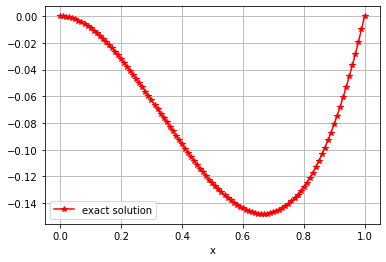

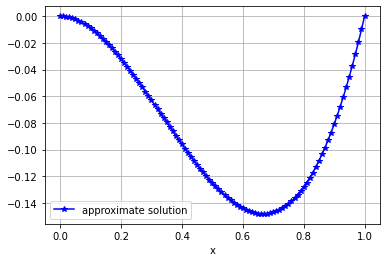

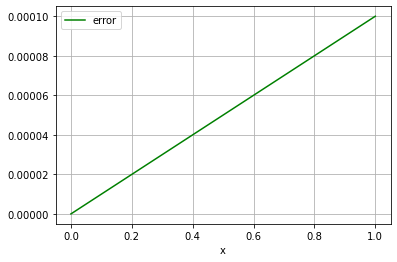

[-0.00000e+00 -9.90000e-05 -3.92000e-04 -8.73000e-04 -1.53600e-03
 -2.37500e-03 -3.38400e-03 -4.55700e-03 -5.88800e-03 -7.37100e-03
 -9.00000e-03 -1.07690e-02 -1.26720e-02 -1.47030e-02 -1.68560e-02
 -1.91250e-02 -2.15040e-02 -2.39870e-02 -2.65680e-02 -2.92410e-02
 -3.20000e-02 -3.48390e-02 -3.77520e-02 -4.07330e-02 -4.37760e-02
 -4.68750e-02 -5.00240e-02 -5.32170e-02 -5.64480e-02 -5.97110e-02
 -6.30000e-02 -6.63090e-02 -6.96320e-02 -7.29630e-02 -7.62960e-02
 -7.96250e-02 -8.29440e-02 -8.62470e-02 -8.95280e-02 -9.27810e-02
 -9.60000e-02 -9.91790e-02 -1.02312e-01 -1.05393e-01 -1.08416e-01
 -1.11375e-01 -1.14264e-01 -1.17077e-01 -1.19808e-01 -1.22451e-01
 -1.25000e-01 -1.27449e-01 -1.29792e-01 -1.32023e-01 -1.34136e-01
 -1.36125e-01 -1.37984e-01 -1.39707e-01 -1.41288e-01 -1.42721e-01
 -1.44000e-01 -1.45119e-01 -1.46072e-01 -1.46853e-01 -1.47456e-01
 -1.47875e-01 -1.48104e-01 -1.48137e-01 -1.47968e-01 -1.47591e-01
 -1.47000e-01 -1.46189e-01 -1.45152e-01 -1.43883e-01 -1.42376e-01
 -1.40625e

In [167]:
u = np.linalg.solve(A,fvec);
#plt.plot(u,'o',label='approximation');
plt.plot(xvec,uevec,'r*-', label='exact solution');
plt.legend(loc='best');
plt.xlabel('x');
plt.grid();
plt.show(); 
plt.plot(xvec,u,'b*-', label='approximate solution');
plt.legend(loc='best');
plt.xlabel('x');
plt.grid();
plt.show(); 
plt.plot(xvec,np.abs(u-uevec),'g', label='error');
plt.legend(loc='best');
plt.xlabel('x');
plt.grid();
plt.show(); 

print(uevec)

## Second Example: Model without closed-form solution $ue(x)$ 

Define exact solution and corresponding source function.  

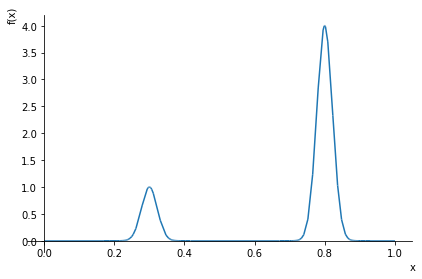

In [90]:
x, f  = sp.symbols('x f');
f = sp.exp(-pow((x-.3),2)/0.001)+4*sp.exp(-pow((x-.8),2)/0.001); # set source function to correspond to exact solution 
#f = sp.exp(-pow((x-.3),2)/0.001); # set source function to correspond to exact solution 
sp.plot(f, (x,0,1),label='source function'); 
plt.show(); 

Define mesh. Evaluate source function in mesh points (right-hand vector in linear system). 

In [ ]:
N=8; h=1/N; h2=h*h; xvec = np.linspace(0,1,N+1);
aux = sp.lambdify(x,f, "numpy"); 
fvec = aux(xvec);
fvec[0]=0; fvec[-1]=0;
print(fvec)

Define the matrix. 

In [ ]:
e = np.ones(N+1); 
A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
A = (1/h2)*A; 
A[0][0]=1; A[0][1]=0;     # handling left-most boundary condition 
A[-1][-1]=1; A[-1][-2]=0; # handling right-most boundary condition 
A[1][0]=0; A[-2][-1]=0;   # make matrix symmetric again 
print(A); #print(xvec)

In [ ]:
u = np.linalg.solve(A,fvec);
plt.plot(u,'-o',label='approximation');
plt.title('Approximate in nodal points'); 
plt.legend(loc='best');
plt.xlabel('t');
plt.grid();
plt.show(); 
print(u)

## Analysis of coefficient matrix 

Check whether $A$ is an M-matrix, i.e., check whether inv($A$) is an positive. 

In [ ]:
B = np.linalg.inv(A); 
print(B.size)
print(B[1:-1][:,1:-1]) # beware of the indexing used toi exclude boundary conditions 
plt.imshow(B[1:-1][:,1:-1]); plt.colorbar(shrink=.92); plt.title('Inverse of 1D Laplacian'); plt.show()

In [ ]:
D,V = np.linalg.eig(A);
# plt.plot(np.sort(D),'o',label='eigenvalues of 1D Laplacian');
#for vec in V: 
#    plt.plot(vec); 
plt.plot(vec(:1))
plt.show();
